# ＫＤ指標  

## 程式實作：取得或計算日ＫＤ指標  

#### 讀取看盤軟體匯出資料

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

In [2]:
##### 使用2022年11月9日到2023年4月17日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day15(1).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA10','MA5','MA10','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA10','MA5','MA10'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

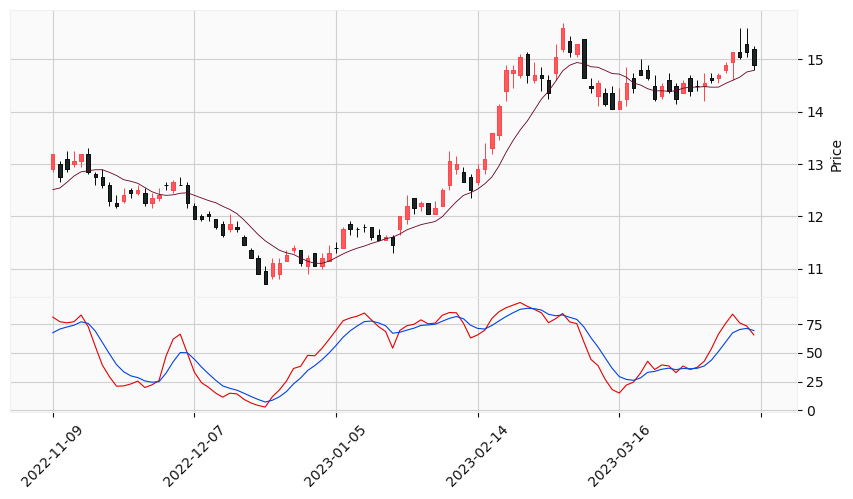

In [3]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:maroon'),
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 使用talib套件計算ＫＤ指標

In [4]:
from talib.abstract import *

# 當使用talib Abstract API時，DataFrame欄位名稱需為小寫
# 請參考書籍：Python：量化交易 Ta-Lib 技術指標 139個活用技巧
df_k_line_talib = df_k_line.copy()
df_k_line_talib.columns=[ i.lower() for i in df_k_line_talib.columns]

In [5]:
talib_kd = STOCH( df_k_line_talib, fastk_period=9, slowk_period=3, slowd_period=3)

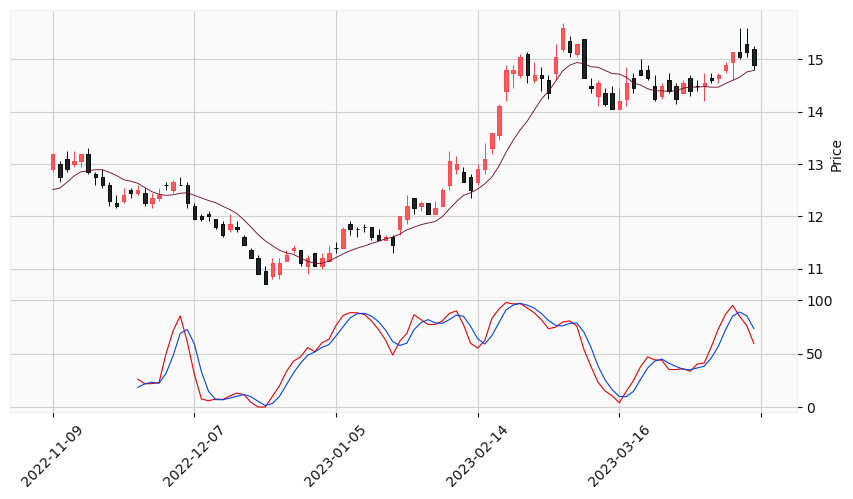

In [6]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:maroon'),
    'K': mpf.make_addplot(talib_kd['slowk'],width=0.8,panel=1,color='xkcd:red'),
    'D': mpf.make_addplot(talib_kd['slowd'],width=0.8,panel=1,color='xkcd:blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：ＫＤ指標黃金交叉與死亡交叉

In [7]:
# 黃金交叉
def crossover(over,down):
    a1 = over
    b1 = down
    a2 = a1.shift(1)
    b2 = b1.shift(1)
    crossover =  (a1>a2) & (a1>b1) & (b2>a2)
    return crossover
# 死亡交叉
def crossunder(down,over):
    a1 = down
    b1 = over
    a2 = a1.shift(1)
    b2 = b1.shift(1)
    crossdown =  (a1<a2) & (a1<b1) & (b2<a2)
    return crossdown

#### 黃金交叉

In [8]:
##### 使用2019年3月19日到2019年6月25日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day15(2).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','MA5','MA10','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','MA5','MA10'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

In [9]:
# 尋找黃金交叉
ret_over=crossover(df_stoch['K(9,3)'],df_stoch['D(9,3)'])

# 標示黃金交叉的點
golden_points_len = len(np.array(df_stoch['D(9,3)']))
golden_points = np.array([np.nan]*golden_points_len)
for idx in range(0,len(ret_over)) :
    if ret_over[idx] :
        golden_points[idx] = df_stoch['D(9,3)'][idx]

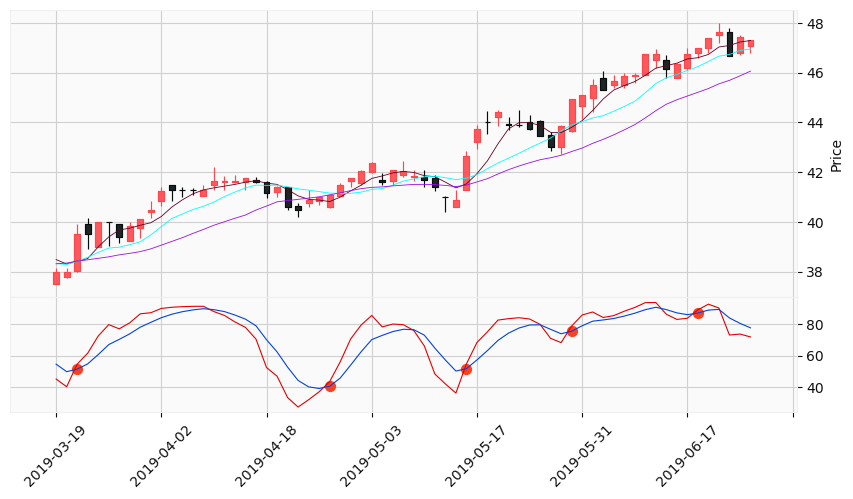

In [10]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue'),
    'Golden': mpf.make_addplot(golden_points,panel=1,type='scatter',marker='o',markersize=50,color='xkcd:orange red') 
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 死亡交叉

In [11]:
##### 使用2022年4月27日到2022年10月11日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day15(3).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','MA5','MA10','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','MA5','MA10'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

In [12]:
# 尋找死亡交叉
ret_under=crossunder(df_stoch['K(9,3)'],df_stoch['D(9,3)'])

# 標示死亡交叉的點
death_points_len = len(np.array(df_stoch['D(9,3)']))
death_points = np.array([np.nan]*death_points_len)
for idx in range(0,len(ret_under)) :
    if ret_under[idx] :
        death_points[idx] = df_stoch['D(9,3)'][idx]

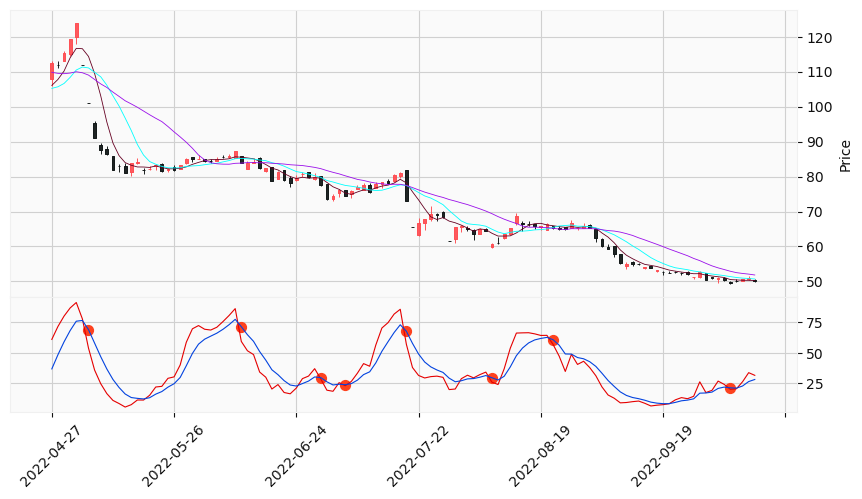

In [13]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'),
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue'),
    'Death': mpf.make_addplot(death_points,panel=1,type='scatter',marker='o',markersize=50,color='xkcd:orange red') 
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

## 程式實作：ＫＤ指標高檔背離與低檔背離

#### 高檔背離

In [14]:
##### 使用2023年1月12日到2023年3月16日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day15(4).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','MA5','MA10','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','MA5','MA10'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

In [15]:
import myutils

# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'high_low')

# 人工方式設定轉折點
turning_point_line_start_date = max_min.loc[8]['Date'].strftime('%Y-%m-%d')
turning_point_line_start_price =  max_min.loc[8]['Price']
turning_point_line_end_date = max_min.loc[28]['Date'].strftime('%Y-%m-%d')
turning_point_line_end_price =  max_min.loc[28]['Price']

In [16]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [17]:
# 尋找死亡交叉
ret_under=crossunder(df_stoch['K(9,3)'],df_stoch['D(9,3)'])

death_points = []
for idx in range(0,len(ret_under)) :
    if ret_under[idx] :
        death_point_date = df_stoch.iloc[idx].name
        death_points.append((date_to_index(df_stoch,death_point_date),death_point_date.strftime('%Y-%m-%d'),df_stoch['D(9,3)'][idx]))

# 人工方式設定交叉點
death_point_line_x = [death_points[1][0],death_points[5][0]]
death_point_line_y = [death_points[1][2],death_points[5][2]]
slope,intercept = np.polyfit(death_point_line_x,death_point_line_y,1)
death_point_line_len = len(np.array(df_stoch['D(9,3)']))
death_point_line = np.array([np.nan]*death_point_line_len)
for idx in range(0,death_point_line_len) :
    if idx >= death_point_line_x[0] and idx <= death_point_line_x[1] :
        death_point_line[idx] = slope * idx + intercept

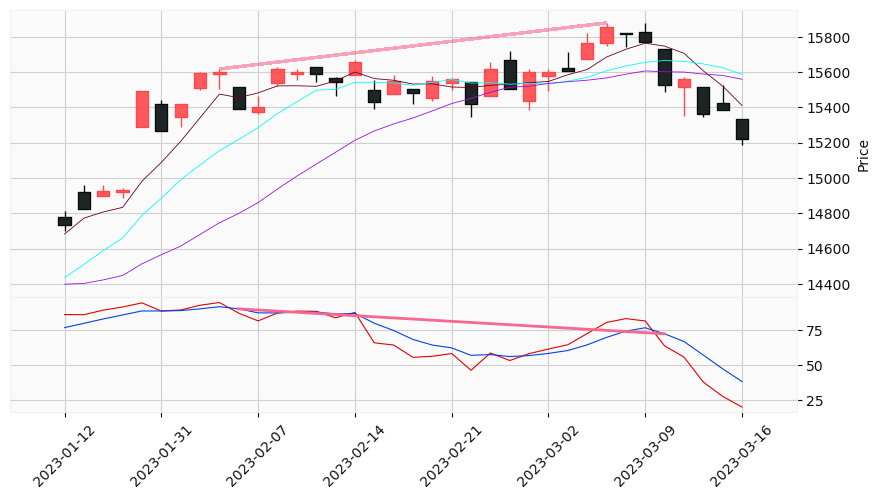

In [18]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定兩點相連的線
seq_of_seq_of_points=[
    [(turning_point_line_start_date,turning_point_line_start_price),(turning_point_line_end_date,turning_point_line_end_price)]
                     ]

# 設定移動平均線與KD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'), 
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue'),
    'DLINE': mpf.make_addplot(death_point_line,width=2.0,panel=1,color='xkcd:rosy pink')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.8, colors='xkcd:rosy pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

#### 低檔背離

In [19]:
##### 使用2018年6月7日到2018年7月24日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day15(5).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA10','SMA20','MA5','MA10','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA5','SMA10','SMA20','MA5','MA10'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

In [20]:
# 尋找轉折點
_,_,max_min = myutils.FindingTurningPoints(df_k_line,'high_low')

# 人工方式設定轉折點
turning_point_line_start_date = max_min.loc[12]['Date'].strftime('%Y-%m-%d')
turning_point_line_start_price =  max_min.loc[12]['Price']
turning_point_line_end_date = max_min.loc[20]['Date'].strftime('%Y-%m-%d')
turning_point_line_end_price =  max_min.loc[20]['Price']

In [21]:
# 尋找黃金交叉
ret_over=crossover(df_stoch['K(9,3)'],df_stoch['D(9,3)'])

golden_points = []
for idx in range(0,len(ret_over)) :
    if ret_over[idx] :
        golden_point_date = df_stoch.iloc[idx].name
        golden_points.append((date_to_index(df_stoch,golden_point_date),golden_point_date.strftime('%Y-%m-%d'),df_stoch['D(9,3)'][idx]))
        
# 人工方式設定交叉點
golden_point_line_x = [golden_points[0][0],golden_points[1][0]]
golden_point_line_y = [golden_points[0][2],golden_points[1][2]]
slope,intercept = np.polyfit(golden_point_line_x,golden_point_line_y,1)
golden_point_line_len = len(np.array(df_stoch['D(9,3)']))
golden_point_line = np.array([np.nan]*golden_point_line_len)
for idx in range(0,golden_point_line_len) :
    if idx >= golden_point_line_x[0] and idx <= golden_point_line_x[1] :
        golden_point_line[idx] = slope * idx + intercept

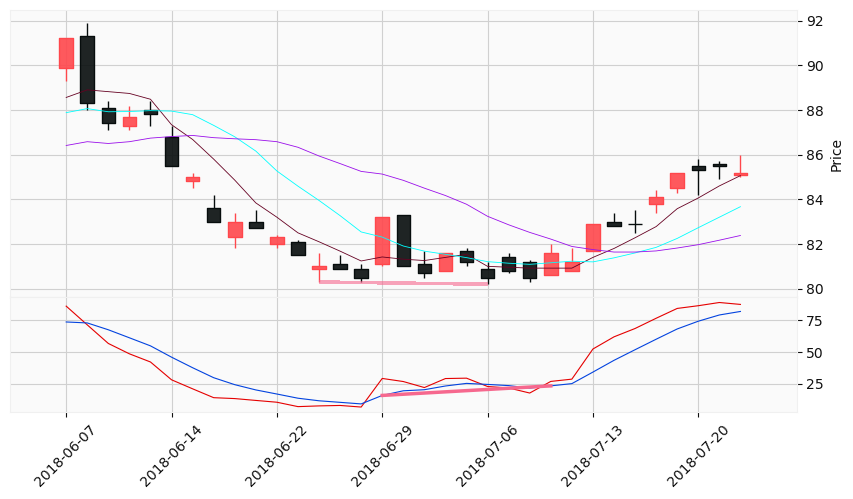

In [22]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定兩點相連的線
seq_of_seq_of_points=[
    [(turning_point_line_start_date,turning_point_line_start_price),(turning_point_line_end_date,turning_point_line_end_price)]
                     ]

# 設定移動平均線與KD指標
added_plots={
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.6,color='xkcd:maroon'),
    "SMA10": mpf.make_addplot(df_sma['SMA10'],width=0.6,color='xkcd:cyan'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.6,color='xkcd:violet'), 
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue'),
    'GLINE': mpf.make_addplot(golden_point_line,width=2.5,panel=1,color='xkcd:rosy pink')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.8, colors='xkcd:rosy pink', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)